# Relational Anime Data Analysis

This Jupyter Notebook performs data analysis on the `anime.csv` dataset. The analysis includes data cleaning, basic statistics, and visualizations to explore relationships between different attributes of anime. Below is a summary of the contents:

1. **Data Import and Initial Setup**:
   - Import necessary libraries: `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
   - Load the dataset: `anime.csv`.

2. **Data Cleaning**:
   - Convert the 'episodes' column to numeric, replacing non-numeric values with NaN.
   - Drop rows with missing values in the 'rating' column for key analyses.

3. **Data Analysis and Visualization**:
   - **Correlation Heatmap**:
     - Generate a heatmap to visualize correlations between 'episodes', 'rating', and 'members'.
   - **Boxplot of Ratings by Type**:
     - Create a boxplot to show the distribution of ratings across different anime types.
   - **Scatter Plot of Episodes vs. Rating**:
     - Visualize the relationship between the number of episodes and ratings, categorized by anime type.
   - **Scatter Plot of Ratings vs. Number of Members**:
     - Explore the relationship between ratings and the number of members, using a log scale for better visualization.

4. **Insights**:
   - The notebook provides insights into how different attributes of anime relate to each other, helping to identify patterns and trends in the dataset.

This notebook serves as a comprehensive analysis tool for understanding the anime dataset, offering visualizations that highlight key relationships and distributions.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'anime.csv'
anime_df = pd.read_csv(file_path)

In [19]:
# Data Cleaning
# Convert 'episodes' to numeric, replacing non-numeric values with NaN
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'], errors='coerce')

# Check for missing values in 'rating' and drop rows with missing values for key analyses
anime_df_cleaned = anime_df.dropna(subset=['rating'])

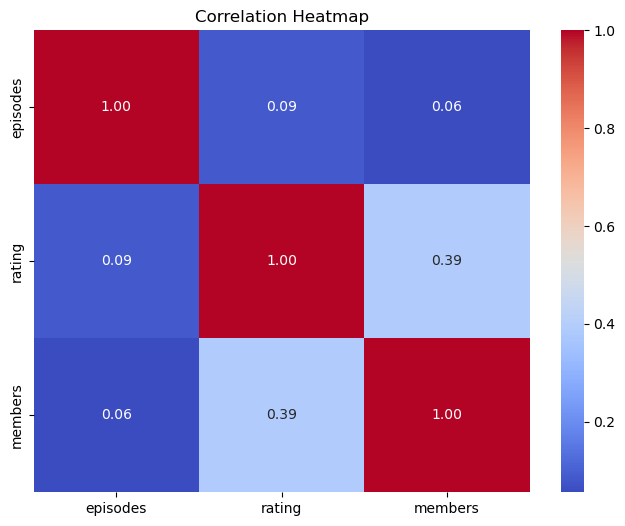

In [20]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(8, 6))
correlation_matrix = anime_df_cleaned[['episodes', 'rating', 'members']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

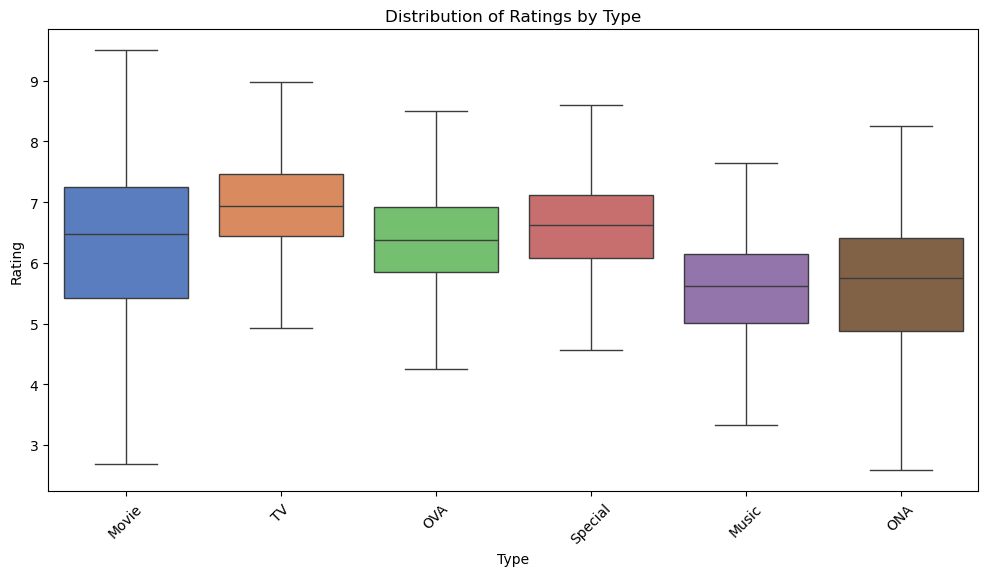

In [21]:
# Boxplot of 'rating' by 'type'
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df_cleaned, hue='type', palette='muted', showfliers=False, legend=False)
plt.title('Distribution of Ratings by Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

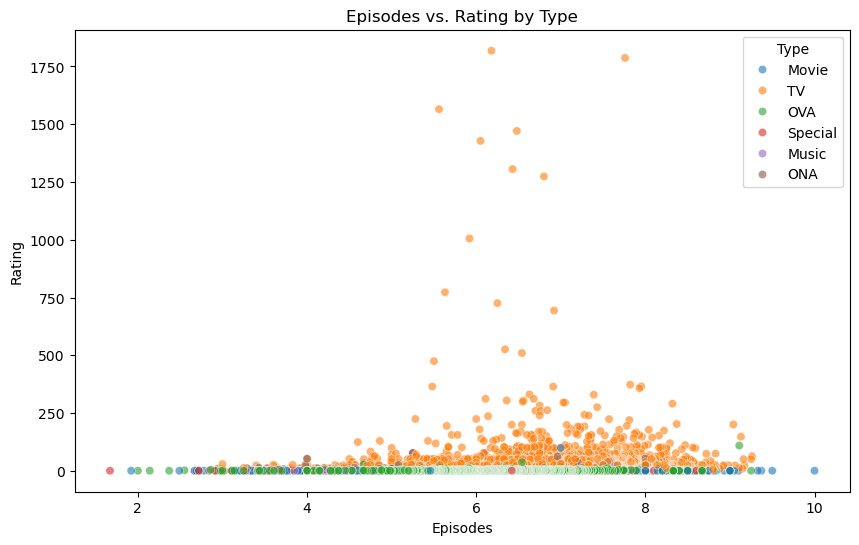

In [22]:
# Episodes vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='episodes', data=anime_df_cleaned, alpha=0.6, hue='type', palette='tab10')
plt.title('Episodes vs. Rating by Type')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()

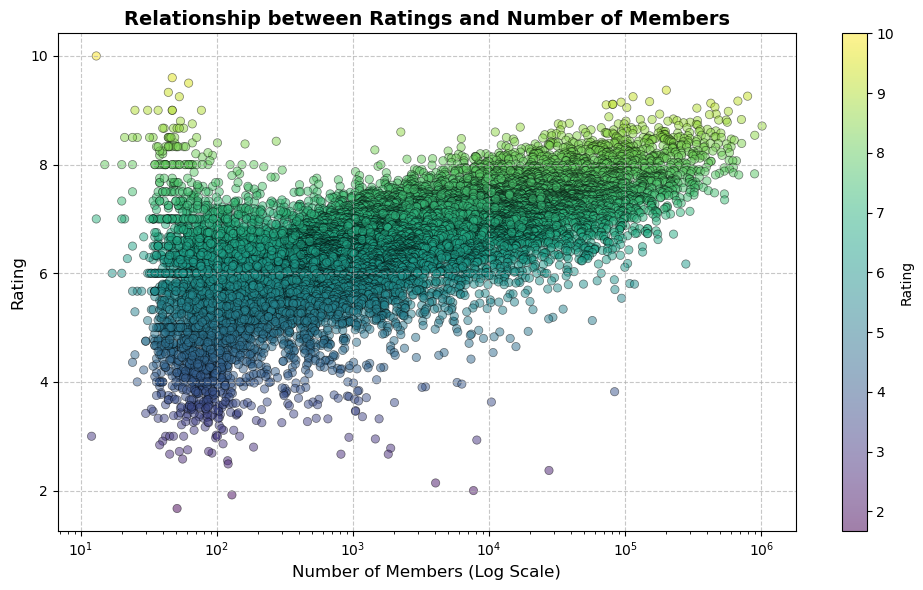

In [23]:
# Relationship between ratings and number of members
plt.figure(figsize=(10, 6))
plt.scatter(anime_df['members'], anime_df['rating'], alpha=0.5, c=anime_df['rating'], cmap='viridis', edgecolor='k', linewidth=0.5)
plt.title('Relationship between Ratings and Number of Members', fontsize=14, fontweight='bold')
plt.xlabel('Number of Members (Log Scale)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xscale('log')  # Using log scale for better visualization
plt.colorbar(label='Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()